<a href="https://colab.research.google.com/github/kunalr33/SOC_RlForAgents/blob/main/SOC_WEEK1Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

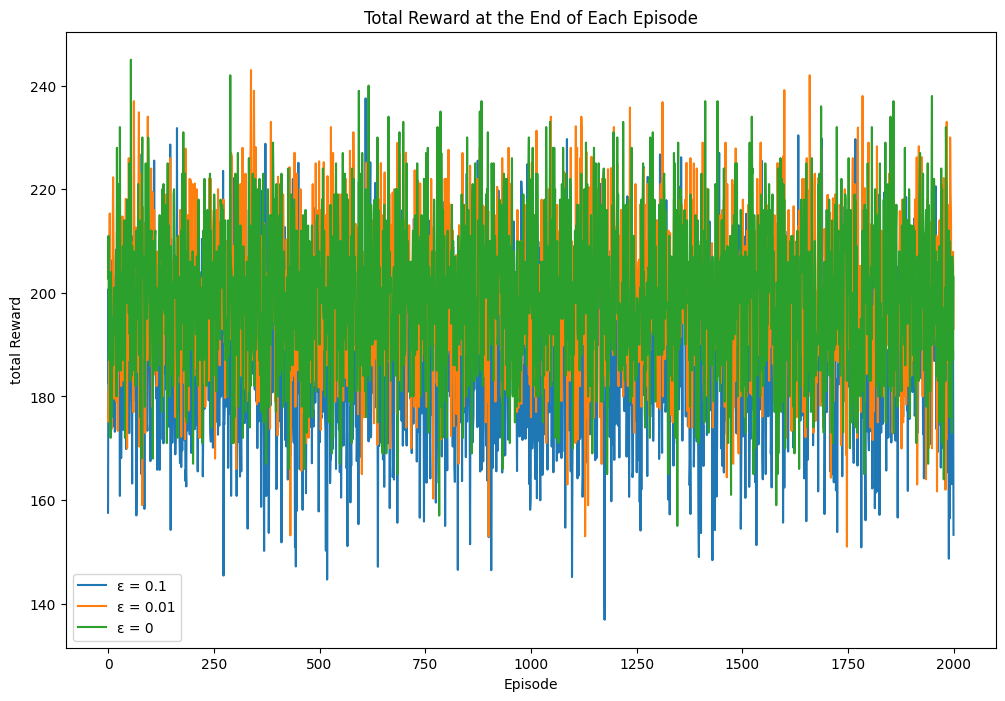

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the reward functions
def gaussian_reward(mean, variance):
    return np.random.normal(mean, np.sqrt(variance))

def coin_toss_reward():
    return 3 if np.random.rand() < 0.5 else -4

def poisson_reward(mean):
    return np.random.poisson(mean)

def exponential_reward(mean):
    return np.random.exponential(mean)

def random_choice():
    pevChoice = [gaussian_reward(0, 1),
               coin_toss_reward(),
               poisson_reward(2),
               gaussian_reward(1, 2),
               exponential_reward(1)]
    return np.random.choice(pevChoice)

#Arm reward functions

reward_functions = [
    lambda: gaussian_reward(0, 1),
    coin_toss_reward,
    lambda: poisson_reward(2),
    lambda: gaussian_reward(1, 2),
    lambda: exponential_reward(1),
    random_choice
]
'''Lambda functions are used to handle the necessary parameters for the distribution functions,
transforming them into no-parameter functions for consistency in calls.'''

# ε-Greedy Algorithm
def epsilon_greedy(epsilon, episodes, steps):
    num_arms = len(reward_functions)
    rewards = np.zeros((episodes, steps))
    V = np.zeros(num_arms)  # Initial estimates of V values
    N = np.zeros(num_arms)  # Counts of arm selections

    for ep in range(episodes):
        for t in range(steps):
            if np.random.rand() < epsilon: #selection and comparison of p
                action = np.random.randint(num_arms)  # Explore
            else:
                action = np.argmax(V)  # Exploit

            reward = reward_functions[action]()
            rewards[ep, t] = reward
            N[action] += 1
            V[action] += (reward - V[action]) / N[action]

    return rewards

# Parameters
episodes = 2000
steps = 100
epsilons = [0.1, 0.01, 0]

# Simulate and plot results
plt.figure(figsize=(12, 8))

for epsilon in epsilons:
    rewards = epsilon_greedy(epsilon, episodes, steps)
    total_rewards = rewards.sum(axis=1)
    plt.plot(total_rewards, label=f'ε = {epsilon}')

plt.xlabel('Episode')
plt.ylabel('total Reward')
plt.title('Total Reward at the End of Each Episode')
plt.legend()
plt.show()
